<a href="https://colab.research.google.com/github/rajputvishwesh/Team-Notebook-Capstone-Project-/blob/main/GTA_CAPSTONE_PROJECT(TEAM_NOTEBOOK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Terrorism is a form of violence that seeks to achieve political, ideological, or religious goals through the use of fear, intimidation, and violence. It is a global problem that affects people from all walks of life and all parts of the world. While acts of terrorism have been committed throughout history, the term "terrorism" has become more widely used since the 1970s to describe a specific type of violent activity.**

## **Explore and analyze the data to discover results and statistics for different terrorist attacks across the world.**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import os
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Global Terrorism Data.csv"
gta_df = pd.read_csv(path , encoding="ISO-8859-1")



In [ ]:
gta_df.head().T

,0,1,2,3,4
eventid,197000000001,197000000002,197001000001,197001000002,197001000003
iyear,1970,1970,1970,1970,1970
imonth,7,0,1,1,1
iday,2,0,0,0,0
approxdate,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
INT_LOG,0,0,-9,-9,-9
INT_IDEO,0,1,-9,-9,-9
INT_MISC,0,1,1,1,1
INT_ANY,0,1,1,1,1


In [ ]:
gta_df.tail().T

,181686,181687,181688,181689,181690
eventid,201712310022,201712310029,201712310030,201712310031,201712310032
iyear,2017,2017,2017,2017,2017
imonth,12,12,12,12,12
iday,31,31,31,31,31
approxdate,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
INT_LOG,0,-9,0,-9,-9
INT_IDEO,0,-9,0,-9,-9
INT_MISC,0,1,0,0,0
INT_ANY,0,1,0,-9,-9


In [ ]:
gta_df.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region

# **Understanding the Data**

In [ ]:
gta_df.shape


(181691, 135)

In [ ]:
gta_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
#Renaming the columns
gta_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                   'region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude',
                   'attacktype1_txt':'AttackType','targtype1_txt':'TargetType','targsubtype1_txt':'TargetSubType',
                   'weaptype1_txt':'WeaponType','gname':'Group','nkill':'Killed','nwound':'Wounded','summary':'Summary','motive':'Motive'},inplace=True)

In [ ]:
#Extracting Necessary Columns
gta_df=gta_df[['eventid','Year','Month','Day','Country','State','Region','City','Latitude','Longitude','AttackType','TargetType','TargetSubType'
       ,'suicide','Killed','Wounded','Summary','Group','WeaponType','Motive','success','multiple']]

In [ ]:
#Seeing First few Entries
gta_df.head()

,eventid,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,...,TargetSubType,suicide,Killed,Wounded,Summary,Group,WeaponType,Motive,success,multiple
0,197000000001,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,Named Civilian,0,1.0,0.0,NaN,MANO-D,Unknown,NaN,1,0.0
1,197000000002,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,...,"Diplomatic Personnel (outside of embassy, cons...",0,0.0,0.0,NaN,23rd of September Communist League,Unknown,NaN,1,0.0
2,197001000001,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,...,Radio Journalist/Staff/Facility,0,1.0,0.0,NaN,Unknown,Unknown,NaN,1,0.0
3,197001000002,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,...,Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Explosives,NaN,1,0.0
4,197001000003,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,...,Embassy/Consulate,0,NaN,NaN,NaN,Unknown,Incendiary,NaN,1,0.0


In [ ]:
gta_df.describe()

,eventid,Year,Month,Day,Latitude,Longitude,suicide,Killed,Wounded,success,multiple
count,1.816910e+05,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,171378.000000,165380.000000,181691.000000,181690.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,0.036507,2.403272,3.167668,0.889598,0.137773
std,1.325957e+09,13.259430,3.388303,8.814045,18.569242,2.047790e+05,0.187549,11.545741,35.949392,0.313391,0.344663
min,1.970000e+11,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,0.000000,2.000000,2.000000,1.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000,1.000000,1.000000


# **Performing Data Analysis**

## Number of Global Attacks per year

Text(0, 0.5, 'Incidents')

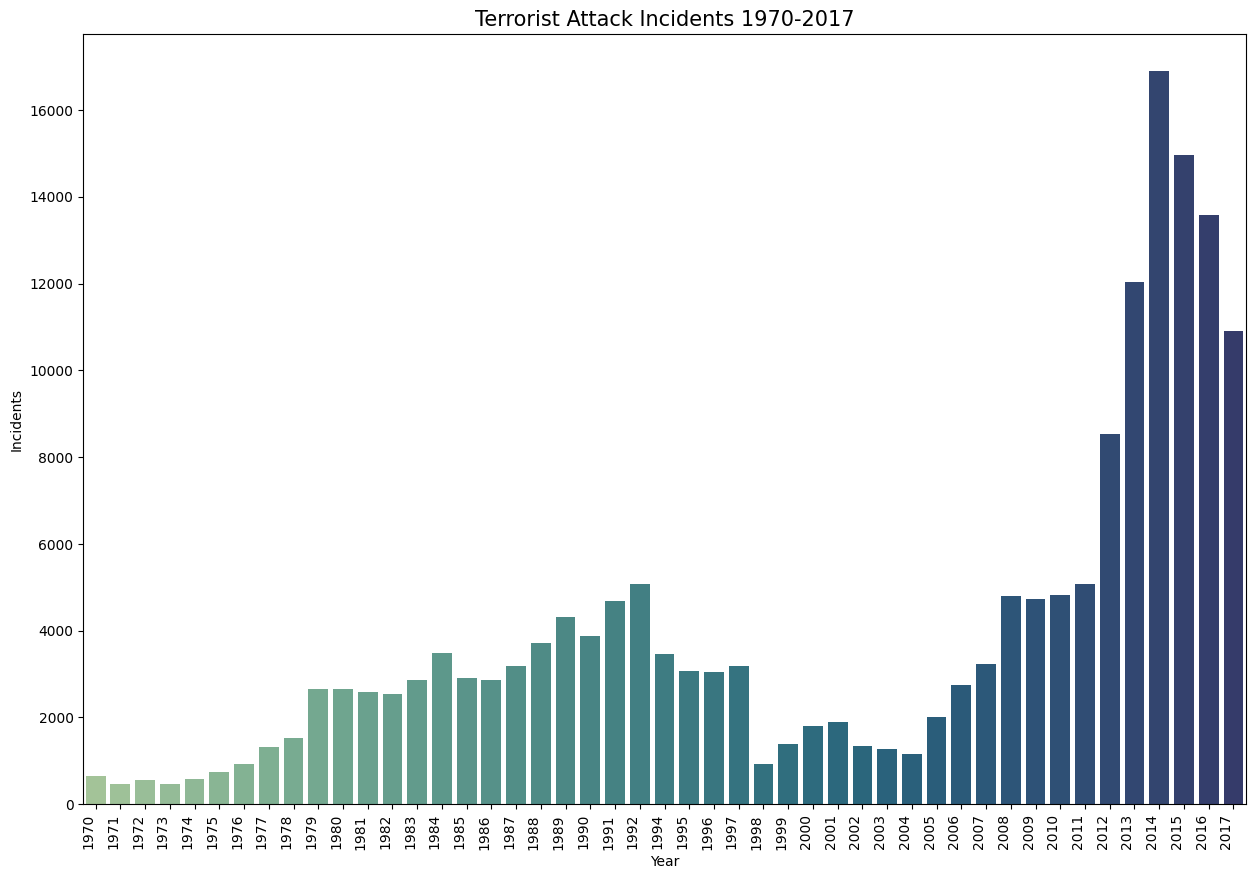

In [ ]:
plt.figure(figsize=(15,10))
v_ = sns.countplot(x='Year',data=gta_df,palette='crest')
v_.set_xticklabels(v_.get_xticklabels(), rotation=90, ha="right")
plt.title('Terrorist Attack Incidents 1970-2017',size=15)
plt.ylabel('Incidents')

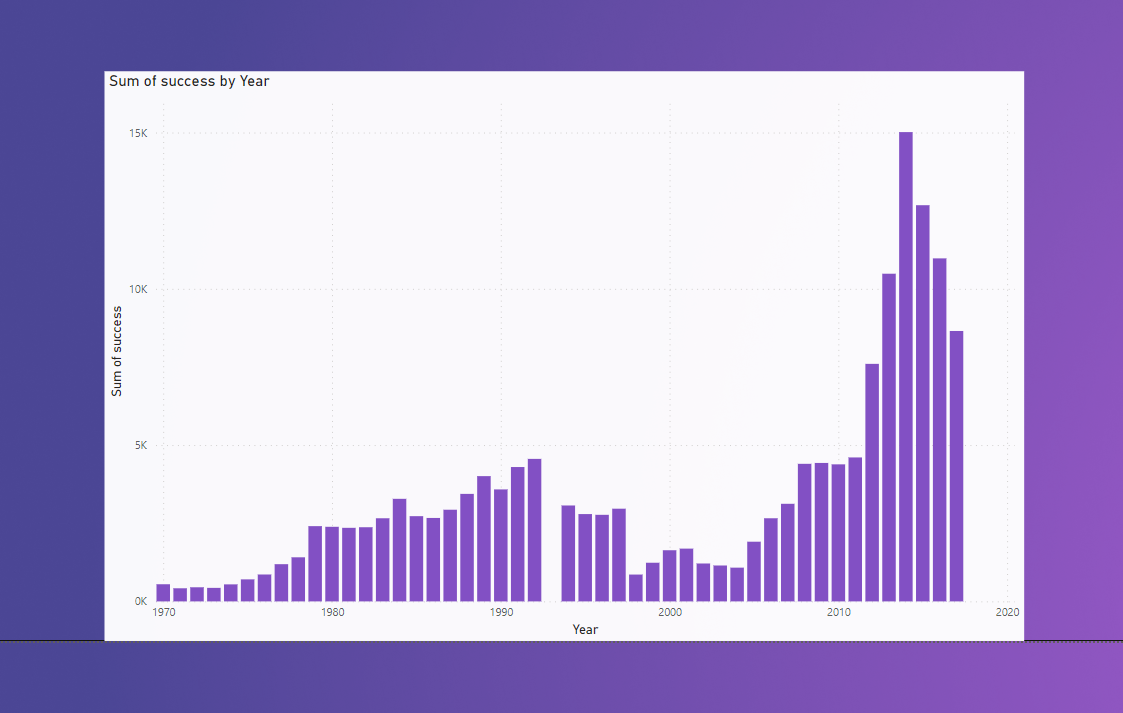

We can observe from this bar graph that there is a sharp increase in terrorist attacks after 1978, and after that there is somewhat mixed level of increment and decrement till 2010 but after that there is an exponential type of growth in the terrorist attacks which reached its peak in 2014.

## **Types of Terrorist Attack**

Text(0, 0.5, 'Year Count')

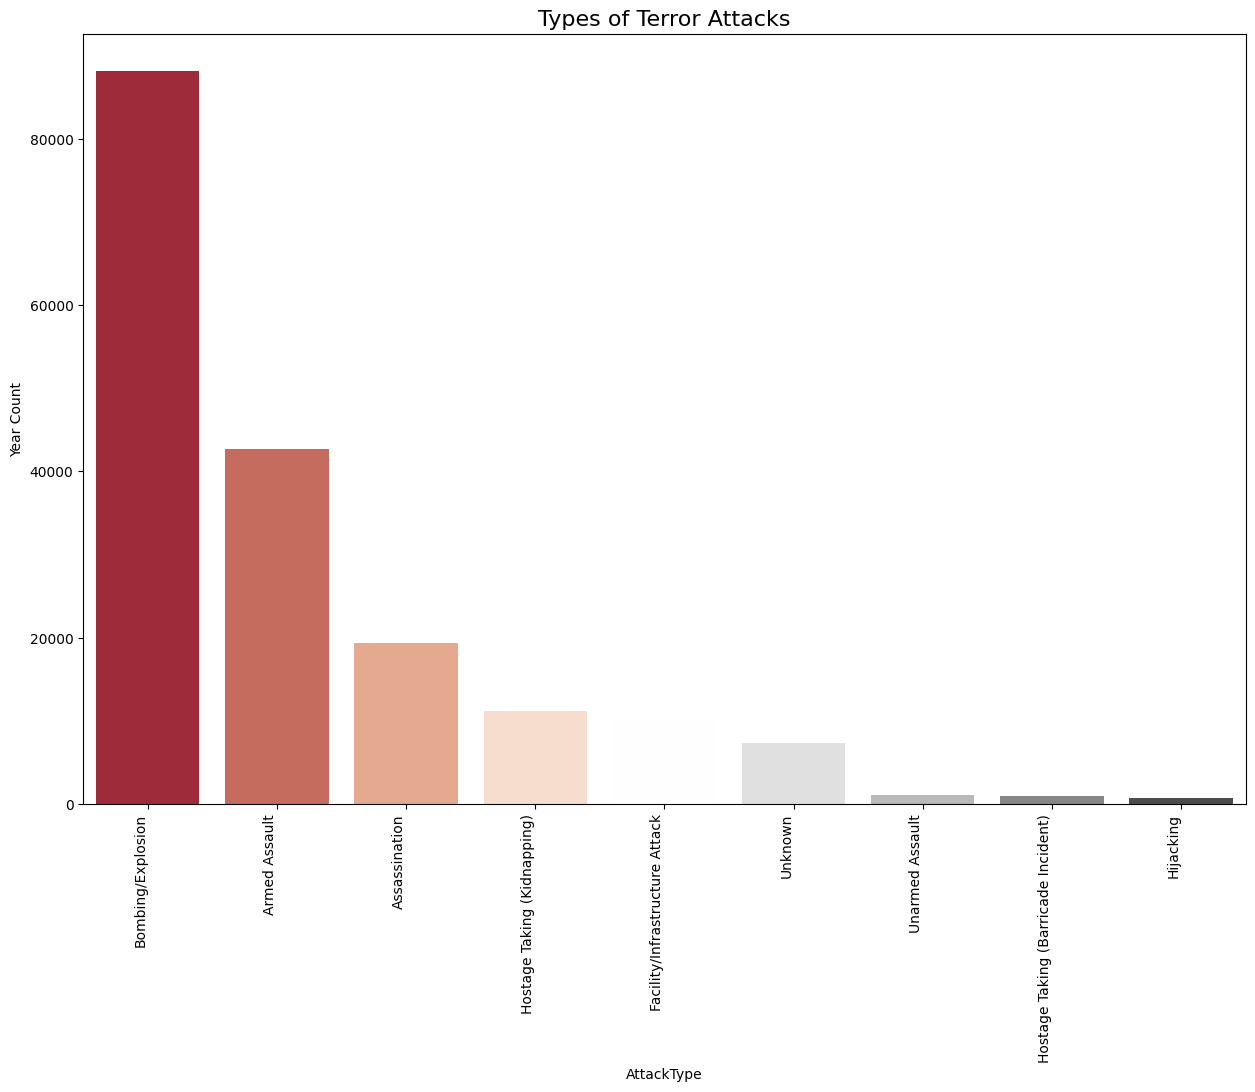

In [ ]:
plt.figure(figsize=(15,10))
v_ = sns.countplot(x='AttackType',data=gta_df,palette='RdGy',order = gta_df['AttackType'].value_counts().index)
v_.set_xticklabels(v_.get_xticklabels(), rotation=90, ha="right")
plt.title('Types of Terror Attacks',size=16)
plt.ylabel('Year Count')

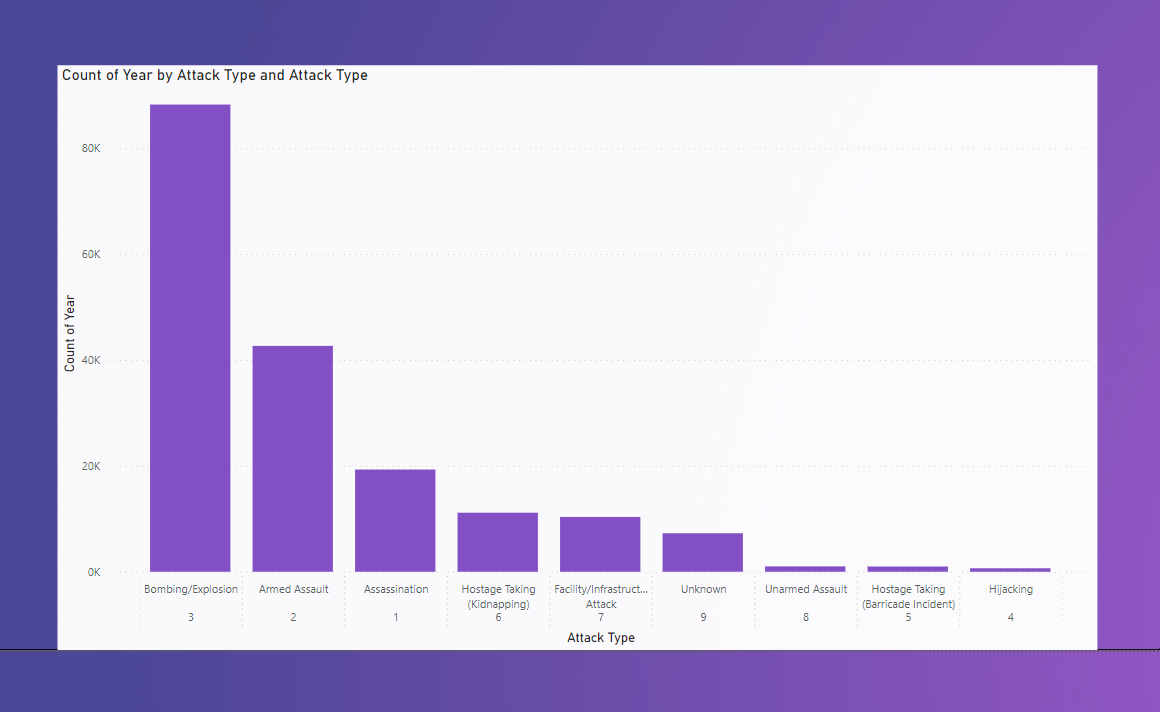

So, as we know that bombing is the most easy method to wreak havoc at a place and which is also evident from this graph that terrorists have done most number of bombing attacks followed by Armed Assault and Assassination and since they need a lot of planning and also the success rate of pulling of Hijacking successfully is low and hence terrorist have preffered Hijacking least which is also evident from the graph.

## **Global bombings**

In [ ]:
gta_df_bombing = gta_df[gta_df['AttackType'] == 'Bombing/Explosion']

Text(-3.6805555555555483, 0.5, 'Incidents')

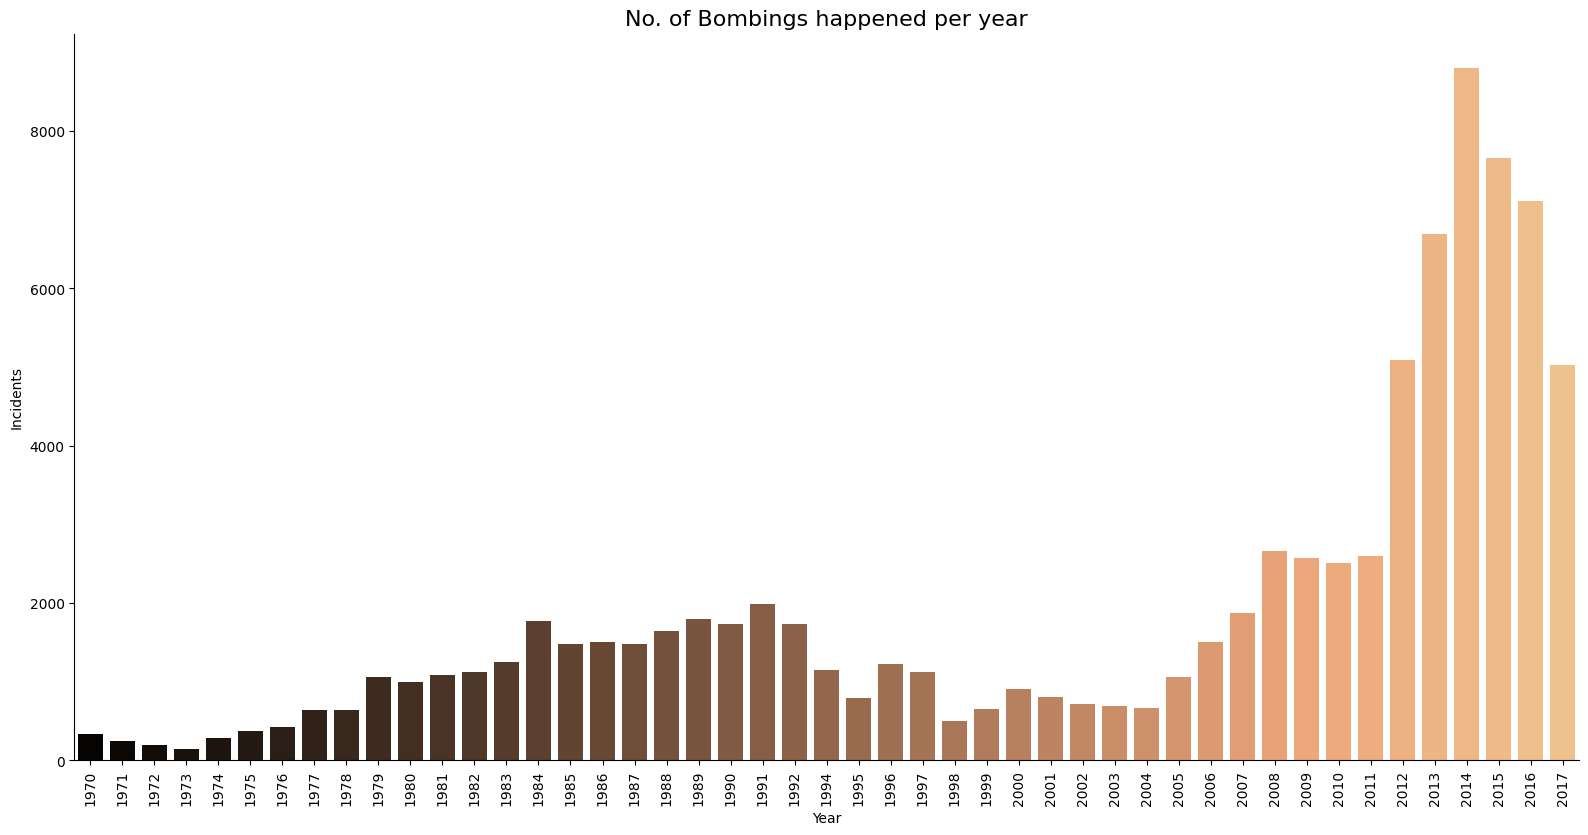

In [ ]:
sns.catplot(x='Year',data=gta_df_bombing,kind='count',height=8, aspect=2,palette='copper')
plt.xticks(rotation=90)
plt.title('No. of Bombings happened per year',size=16)
plt.ylabel('Incidents')

We can analyse here from this graph that the number of bombings follow a mixed trend of increment and decrement till 2011, but after that there is an exponential growth in the bombings till 2017 which achieves its peak in 2014.

## **Attacks by Region**

Text(0, 0.5, 'Number of Attacks')

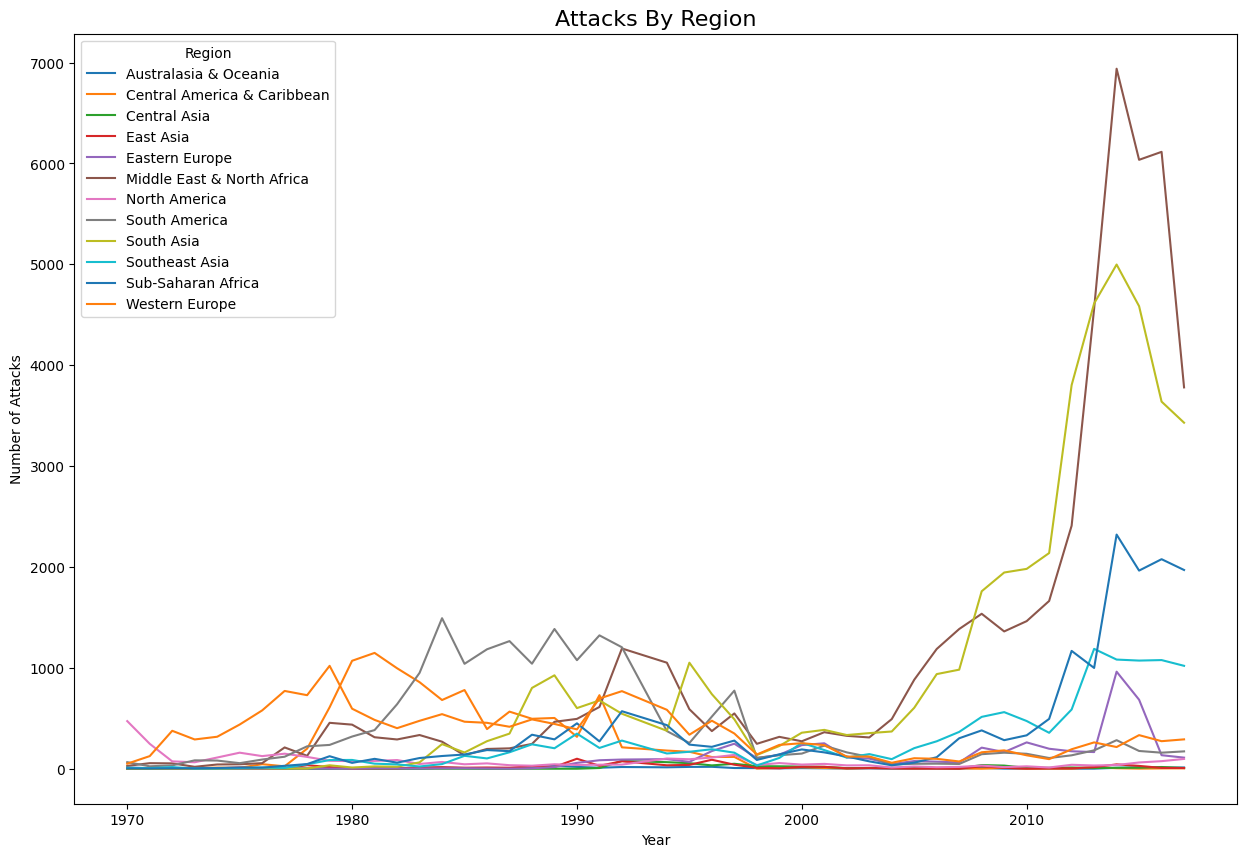

In [ ]:
pd.crosstab(gta_df.Year,gta_df.Region).plot(figsize=(15,10))
plt.title('Attacks By Region',size=16)
plt.ylabel('Number of Attacks')


Here we can observe from this graph that there is a mix trend in number of attack in nearly every country but the graph takes an exponential growth since 2003 , and also we can analyse that the most vulnerable countries has been Middle East and North Africa followed by South Asia

## **Target Type of Plot**

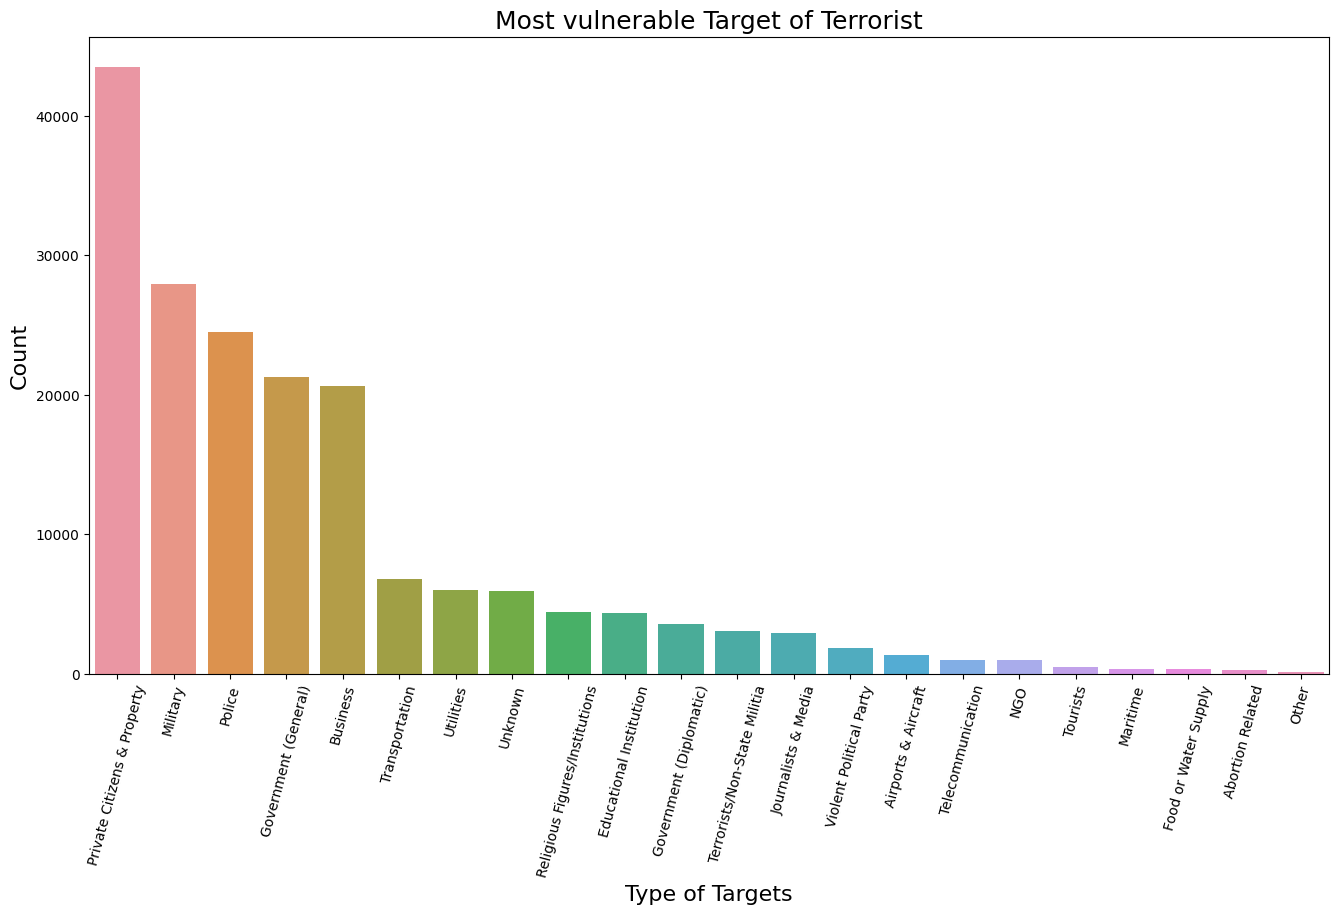

In [ ]:
v_=plt.rcParams['figure.figsize'] = 16,8.27
v_=sns.countplot(x='TargetType',data=gta_df,order = gta_df['TargetType'].value_counts().index)
v_.set_xlabel('Type of Targets',fontsize=16)
plt.xticks(rotation = 75)
v_.set_ylabel('Count',fontsize=16)
v_.set_title('Most vulnerable Target of Terrorist',fontsize=18);

We can analyse from this bar graph that the most vulnerable are Private Citizens and Properties followed by Military and Police that is also evident from the fact that miltary and police are most exposed and have the responsibility to handle any type of attack.

## **Number of Terrorist Attacks in each Country**


Text(0.5, 1.0, 'Top-10:Total Attacks by Country')

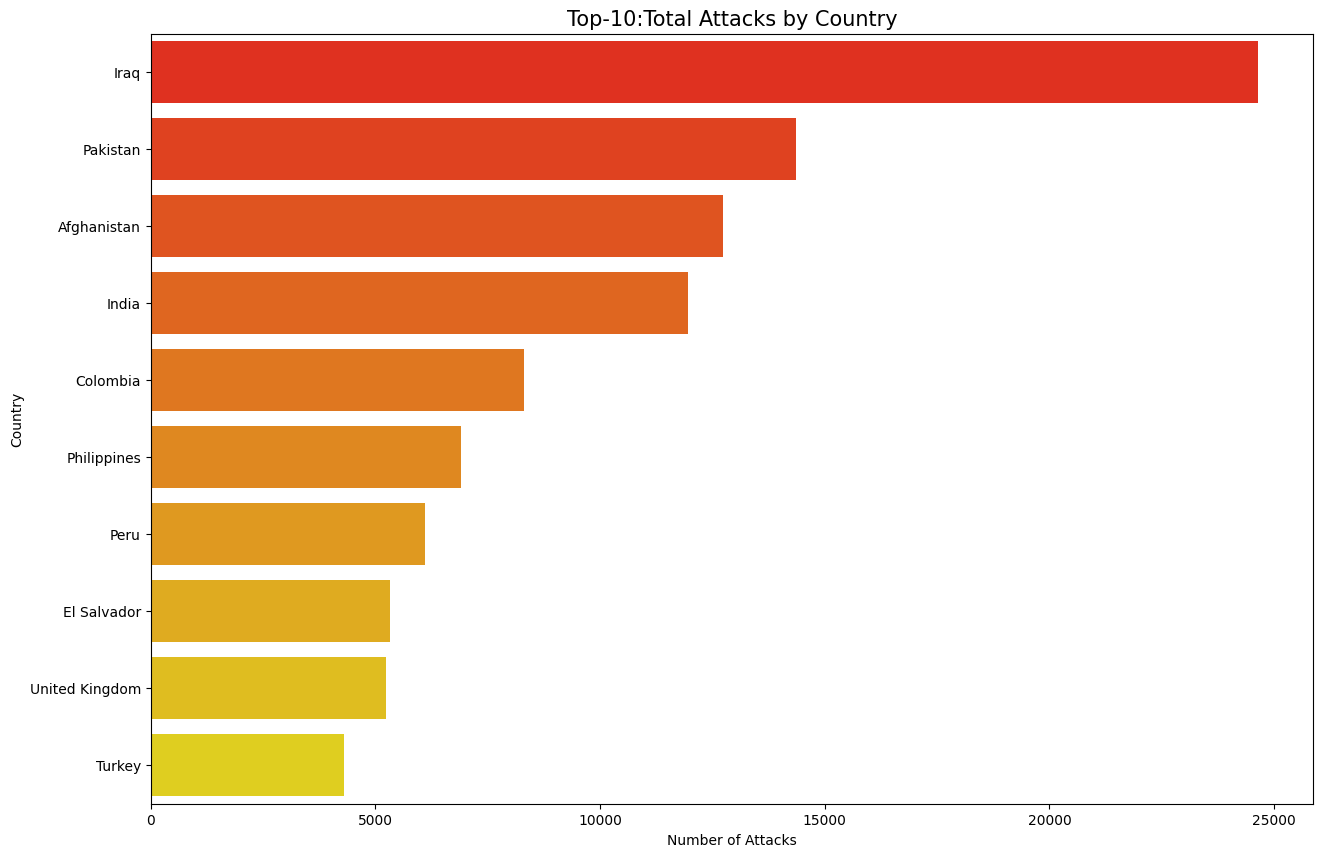

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = gta_df['Country'].value_counts().values[:10], y = gta_df['Country'].value_counts()[:10].index,palette = 'autumn')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.title('Top-10:Total Attacks by Country',size=15)

We can Analyse from this graph that the most vulnerable countries to terrorist attacks are Iraq and Pakistan followed by Afganistan and India and the least vulnerable Country is Turkey.
We can also analyse that nearly no country is left from these attacks Pakistan which is blamed everytime for giving shelter to the terrorists is also not spared by these attacks so we can say that Terrorism is not good for any country .

## **Number of attacks by Type of Organisation**

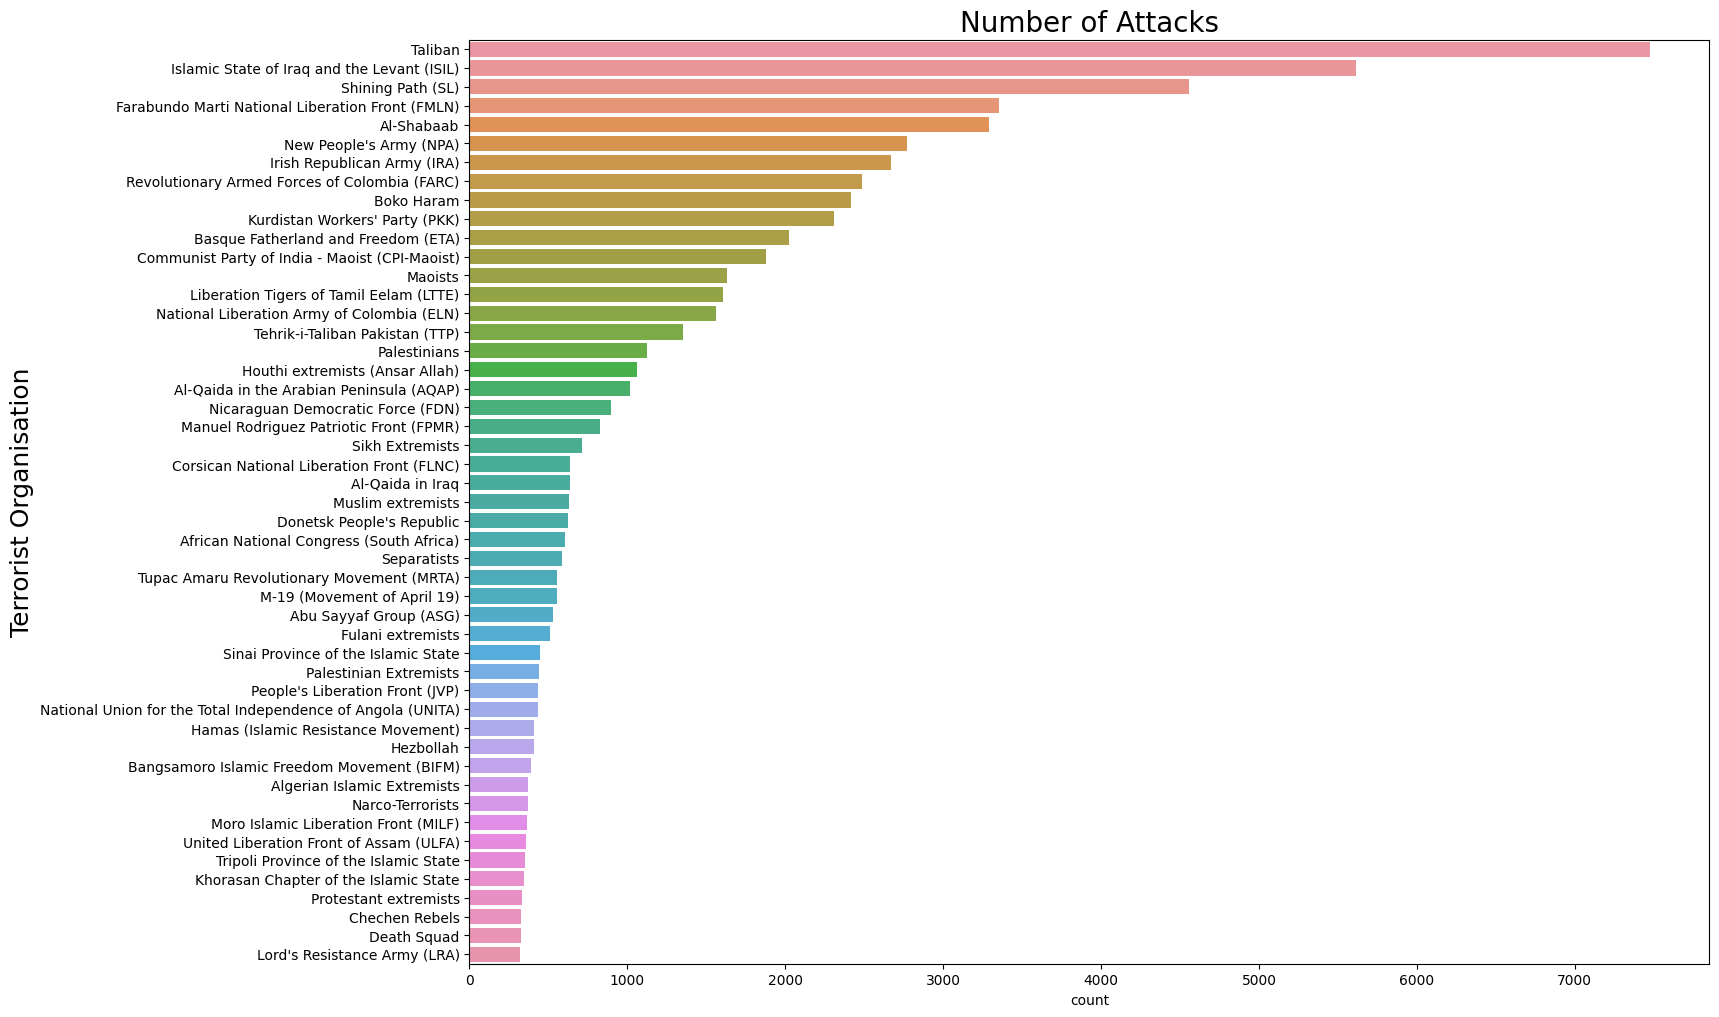

In [ ]:
v_=plt.rcParams['figure.figsize'] = 16,12
v_=sns.countplot(y='Group',data=gta_df,order = gta_df['Group'].value_counts().index[1:50])
# plt.yticks(rotation = 75)
v_.set_ylabel('Terrorist Organisation',fontsize=18)
v_.set_title('Number of Attacks',fontsize=20);

Hence we can analyse from this graph that the most number of terrorist attacks are done by Taliban which is followed by ISIL and SL so all the countries sercret agencies should have a close look on  the activities of these organisations in order to avoid future attacks.

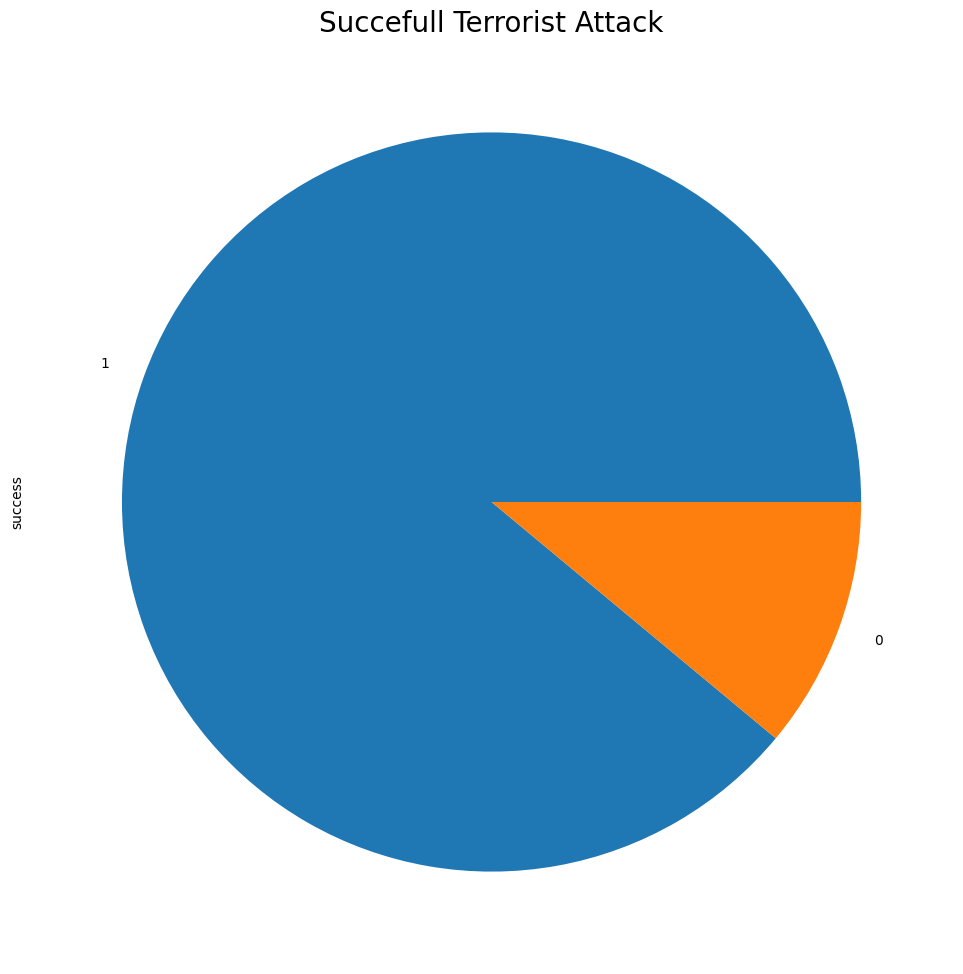

In [ ]:
v_=gta_df['success'].value_counts().plot(kind='pie')
v_.set_title('Succefull Terrorist Attack',fontsize=20);

In [ ]:
suceess_country=gta_df.groupby('Country').agg({'eventid':'count','success':'sum'}).reset_index()
suceess_country.columns=['country','Total_Attacks','Attack_Success']
suceess_country['Attack_Failed']=suceess_country['Total_Attacks']-suceess_country['Attack_Success']
suceess_country['Failure_Rate_Attack']=(suceess_country['Attack_Failed']/suceess_country['Total_Attacks'])*100
suceess_country['Success_Rate_Attack']=(suceess_country['Attack_Success']/suceess_country['Total_Attacks'])*100
suceess_country=suceess_country.round(2)

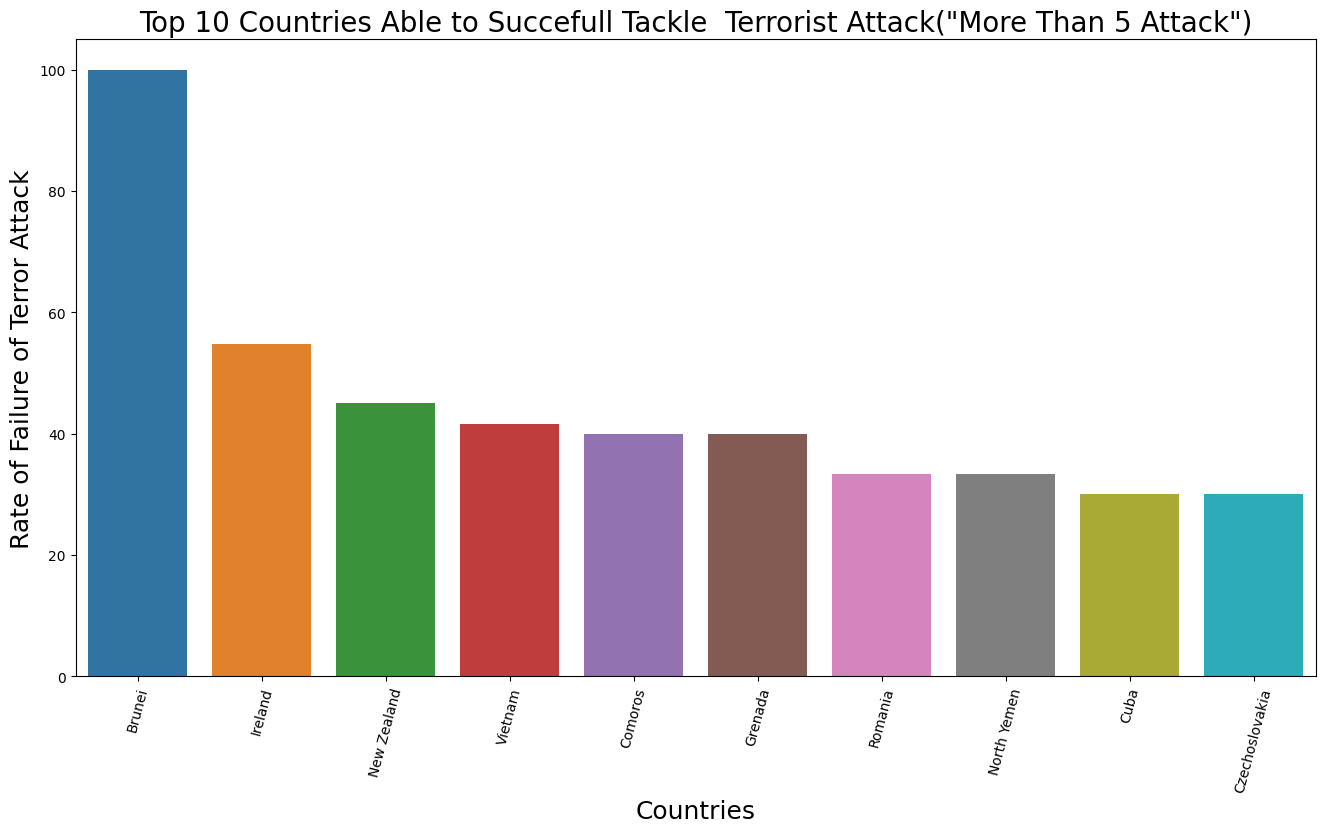

In [ ]:
able_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Failure_Rate_Attack',ascending=False )[:10]
plot_able_stop_terror_attack=able_stop_terror_attack.loc[:,['country','Failure_Rate_Attack']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='country',y='Failure_Rate_Attack',data=plot_able_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Failure of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries Able to Succefull Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);

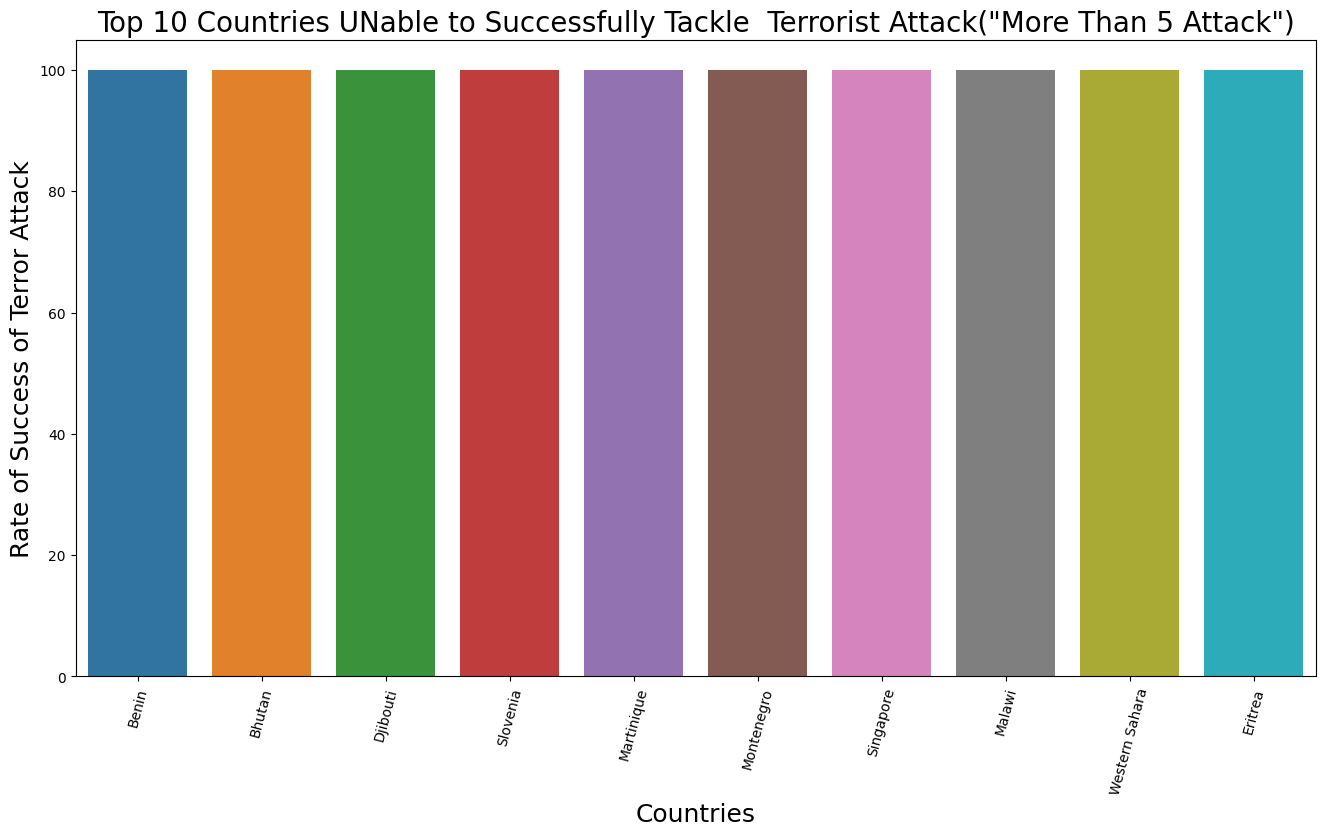

In [ ]:
unable_stop_terror_attack=suceess_country[suceess_country['Total_Attacks']>=5].sort_values('Success_Rate_Attack',ascending=False )[:10]
plot_unable_stop_terror_attack=unable_stop_terror_attack.loc[:,['country','Success_Rate_Attack','Total_Attacks']]
ax=plt.rcParams['figure.figsize'] = 16,8.27
ax=sns.barplot(x='country',y='Success_Rate_Attack',data=plot_unable_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Success of Terror Attack',fontsize=18)
ax.set_title('Top 10 Countries UNable to Successfully Tackle  Terrorist Attack("More Than 5 Attack")',fontsize=20);

In [ ]:
#Preparing the data for analysis
Iraq = gta_df[gta_df.Country == 'Iraq']
Iraq_cities = Iraq.groupby(by='City',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:5,]

Iraq_suicide_size = Iraq['suicide'].sum() / len(Iraq)
labels = ['Suicide', 'Not Suicide']

Iraq_year = Iraq.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

Iraq_weapon = Iraq.groupby(by='WeaponType',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:,:2]

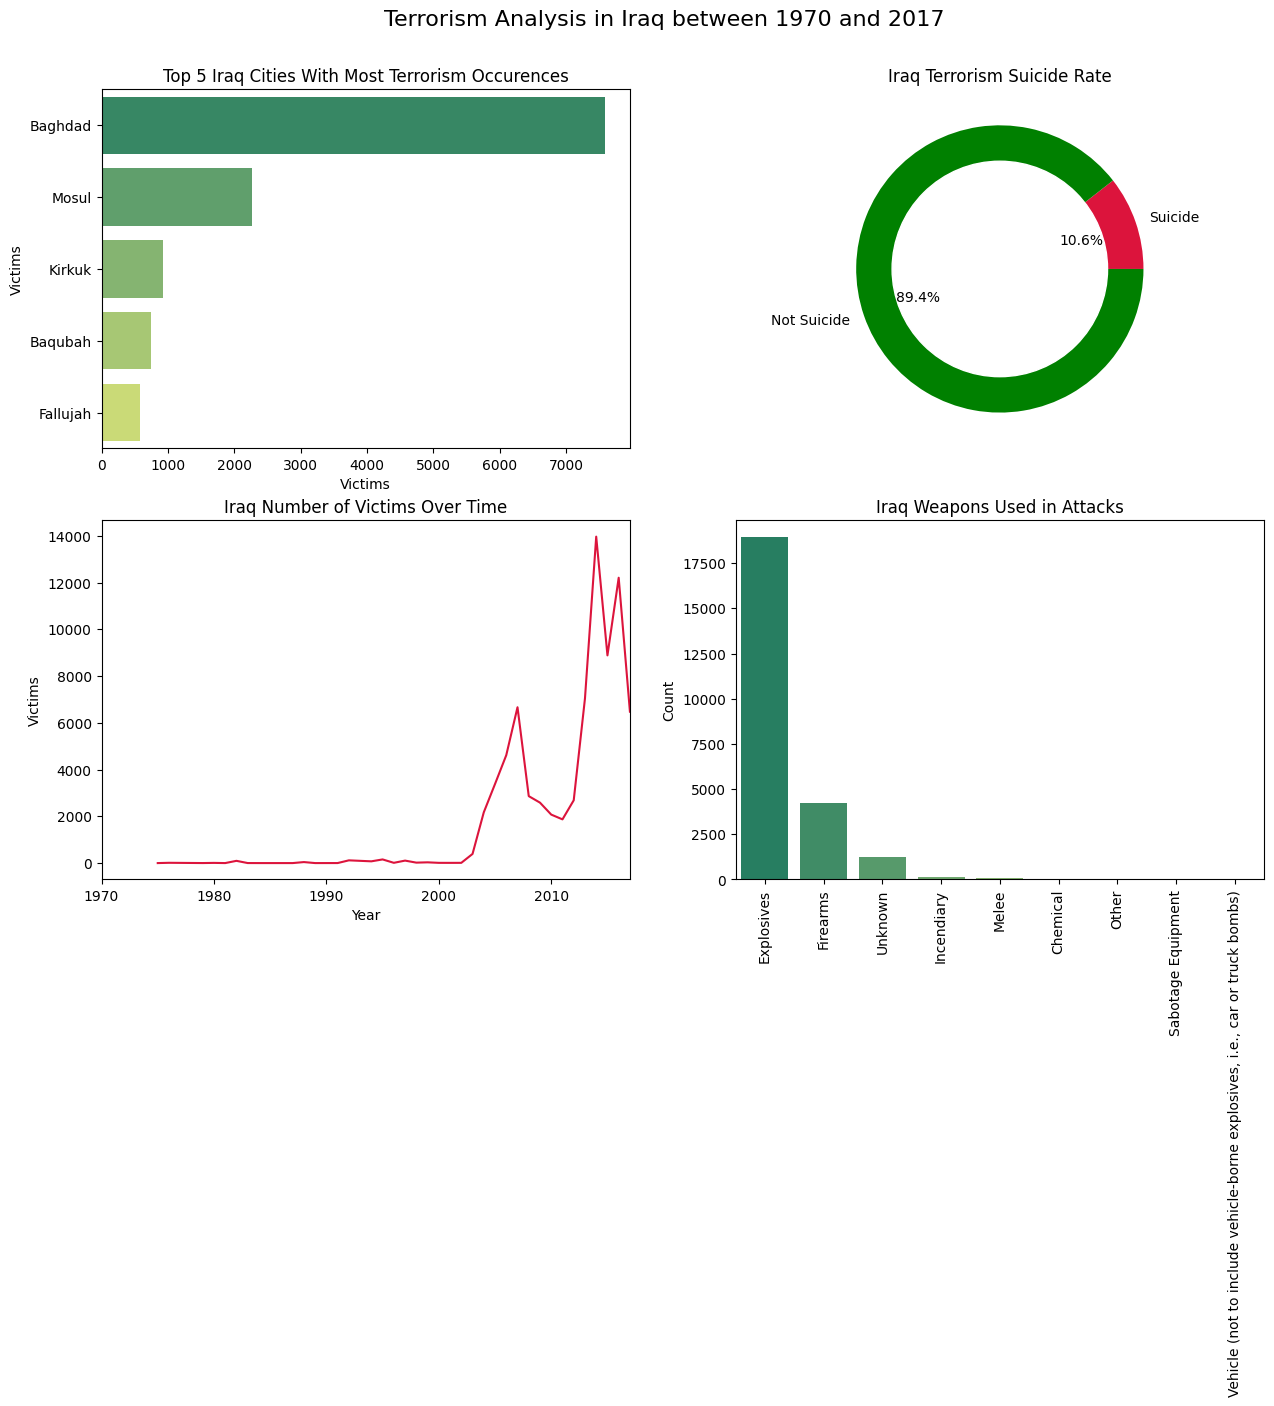

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1 - Top 5 terrorism cities    
sns.barplot(x='eventid', y='City', data=Iraq_cities, ci=None, ax=axs[0, 0],palette='summer')
axs[0, 0].set_title(f'Top 5 Iraq Cities With Most Terrorism Occurences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Victims')

# Plot 2 - Suicide Rate
center_circle = plt.Circle((0,0), 0.75, color='white')
axs[0, 1].pie((Iraq_suicide_size, 1-Iraq_suicide_size), labels=labels,colors=['crimson','green'] , autopct='%1.1f%%')
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('Iraq Terrorism Suicide Rate')
axs[0, 0].set_ylabel('Victims')

# Plot 3 - Victims through the years
sns.lineplot(x='Year', y='Killed', data=Iraq_year, ax=axs[1, 0],color='crimson')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('Iraq Number of Victims Over Time')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons
sns.barplot(x='WeaponType', y='eventid', data=Iraq_weapon, ci=None, ax=axs[1, 1],palette='summer')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Iraq Weapons Used in Attacks')

plt.suptitle('Terrorism Analysis in Iraq between 1970 and 2017', size=16)    
plt.subplots_adjust(top=0.90)
plt.show()